In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from PIL import Image
import glob
import os
import cv2 
print( cv2.__version__ )

4.2.0


In [2]:
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    img_dir = r"D:\New folder\Minor_proj\dir\Train\{0}".format(i)
    data_path = os.path.join(img_dir,"*g")
    file = glob.glob(data_path)
    
    Class=os.listdir(img_dir)
    for a in file:
#         try:
            image = cv2.imread(a)
          
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
#         except AttributeError:
#             print("error")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]


In [3]:
#Spliting the images into train and validation sets

X_train=Cells[(int)(0.2*len(labels)):]
X_val = Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
# X_train = X_train.reshape((-1,31368,30,30,3)) 
# X_train.shape = list((31368, 30, 30, 3))
# X_train = X_train.reshape((31368,30,30,3))
# X_train.shape=np.squeeze(X_train,axis=0).shape
# X_train = np.expand_dims(X_train,axis=0)
# X_train = np.expand_dims(X_train,axis=0)
# X_train = np.expand_dims(X_train,axis=0)
# X_train = X_train.reshape((30,30)) 
print(X_train.shape)
# new = X_train.shape[2:]
print(X_train.ndim)

(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

(31368, 30, 30, 3)
4


Using TensorFlow backend.


In [4]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout



model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

Train on 31368 samples, validate on 7841 samples
Epoch 1/50
31368/31368 [==============================] - 98s 3ms/step - loss: 0.0647 - accuracy: 0.9810 - val_loss: 0.0211 - val_accuracy: 0.9949
Epoch 2/50
31368/31368 [==============================] - 102s 3ms/step - loss: 0.0763 - accuracy: 0.9781 - val_loss: 0.0301 - val_accuracy: 0.9939
Epoch 3/50
31368/31368 [==============================] - 82s 3ms/step - loss: 0.0553 - accuracy: 0.9837 - val_loss: 0.0272 - val_accuracy: 0.9936
Epoch 4/50
31368/31368 [==============================] - 82s 3ms/step - loss: 0.0588 - accuracy: 0.9831 - val_loss: 0.0257 - val_accuracy: 0.9936
Epoch 5/50
31368/31368 [==============================] - 84s 3ms/step - loss: 0.0597 - accuracy: 0.9824 - val_loss: 0.0246 - val_accuracy: 0.9943
Epoch 6/50
31368/31368 [==============================] - 82s 3ms/step - loss: 0.0529 - accuracy: 0.9849 - val_loss: 0.0222 - val_accuracy: 0.9957
Epoch 7/50
31368/31368 [==============================] - 81s 3ms/st

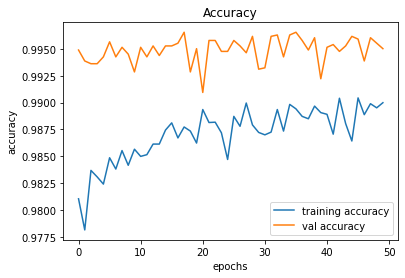

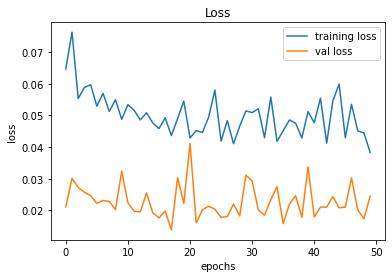

In [12]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 50
history = model.fit(X_train, y_train,validation_split=0.33, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
history_dict = history.history
# acc = history_dict["acc"]
# val_acc = history_dict['val accuracy']
# loss = history_dict['traning loss']
# val_loss = history_dict['val loss']
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [13]:
#Predicting with the test data
y_test=pd.read_csv(r"D:\New folder\Minor_proj\dir\Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]
img_dir = r"D:\New folder\Minor_proj\dir\Test"
data_path = os.path.join(img_dir,"*g")
labels = glob.glob(data_path)
for f in labels:
    image=cv2.imread(f)
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

In [14]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.971575613618369

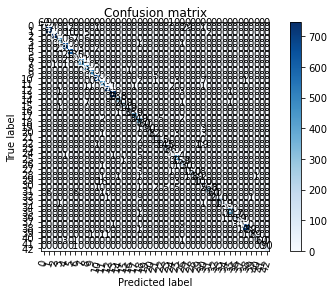

In [15]:
#confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(43)
cm = confusion_matrix(pred,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')